### Student Information
Name: 施冠彰

Student ID: 111062572

GitHub ID: eric12345566

Kaggle name: ericshih

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

## 1. Take Home

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


### Exercise 1:

In [9]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

count_vect_train = CountVectorizer()
count_vect_test = CountVectorizer()

train_counts = count_vect_train.fit_transform(train_df.text)
test_counts = count_vect_test.fit_transform(test_df.text)

train_term_frequencies = []
train_term_frequencies = np.sum(train_counts[:, :].T.toarray(), axis=1)


test_term_frequencies = []
test_term_frequencies = np.sum(test_counts[:, :].T.toarray(), axis=1)

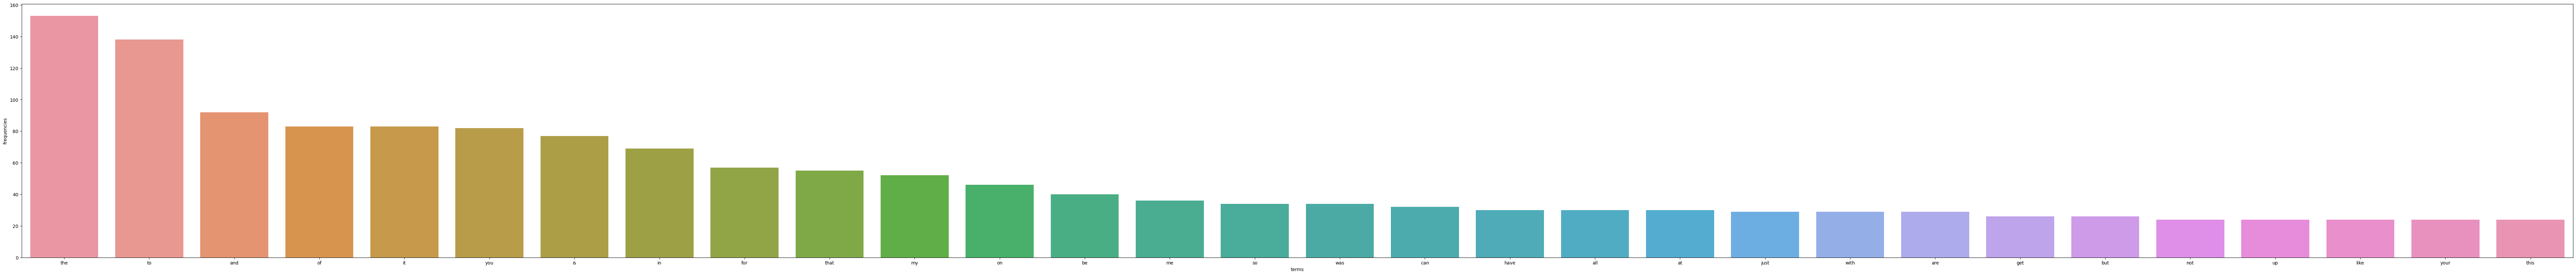

In [11]:
# test_counts
df = pd.DataFrame({"terms":count_vect_test.get_feature_names_out(), "frequencies": test_term_frequencies })
df_sort = df.sort_values(['frequencies'],ascending=False)[:30]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x='terms', y='frequencies', data=df_sort)

### Exercise 2:

In [12]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

train_Tfidf_vectorizer = TfidfVectorizer(max_features=1000)
train_tfidf = train_Tfidf_vectorizer.fit_transform(train_df['text'])

train_data_Tfidf_features_1000 = train_Tfidf_vectorizer.transform(train_df['text'])

feature_names_1000 = train_Tfidf_vectorizer.get_feature_names_out()
feature_names_1000[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

### Exercise 3:

When we look at the confusion martix, we can know that anger and fear will have some ambiguous for the model. For example, the model will prdict the anger text as the fear, and the fear pridict as the anger or sadness. But the text which the true label is joy or sadness have more accuracy then anger and fear. Which means the words of the anger text is similar to the words of fear text, so let the model have some ambiguous of it.

### Exercise 4:

In [15]:
# Answer here
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

tfidf_vectorizer = TfidfVectorizer()

X_train = tfidf_vectorizer.fit_transform(train_df['text'])
Y_train = train_df['emotion']

X_test = tfidf_vectorizer.transform(test_df['text'])
Y_test = test_df['emotion']

print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)

print("X_test.shape: ", X_test.shape)
print("Y_test.shape: ", Y_test.shape)

bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)

print("TF-IDF feature on Naive Bayes classifier acc: ", bnb.score(X_test, Y_test))

X_train.shape:  (3613, 10115)
Y_train.shape:  (3613,)
X_test.shape:  (347, 10115)
Y_test.shape:  (347,)
TF-IDF feature on Naive Bayes classifier acc:  0.6484149855907781


### Exercise 5: 

Look like the result is not better then the Decision Tree. The reason why the Naive Bayes model is worst Decision Tree model is the Bayes model assume the class condition is independently. This assumtion is not suitable at this case bacuase some words in the text can repersent as the sad mood, but repersent the anger mood in another text.

### Exercise 6:

In [ ]:
# Answer here
fig = plt.figure(figsize=(15, 6), facecolor="#f5f5f5")
ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)

training_log.plot(x="epoch", y=["accuracy","val_accuracy"], ax=ax_1)
training_log.plot(x="epoch", y=["loss","val_loss"], ax=ax_2)
plt.show()

### Exercise 7:

Just like part 2 of this homework, first, we have to fit the text to the vector with gensim's word2vec model or other word2vec pretrain model. second, we conver the model into embedding matrix, this will be the input of the Embedding layer in the model. Third, we will use Tokenizer to transfer the text into 2d matrix. And we can now train the model with the deep learning method like LSTM or other RNN architecture.

### Exercise 8:

In [18]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

# Answer here
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

load ok
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Sa

/home/eric/anaconda3/envs/dm_tf_2.5_py_3.7_spacy/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/eric/anaconda3/envs/dm_tf_2.5_py_3.7_spacy/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/eric/anaconda3/envs/dm_tf_2.5_py_3.7_spacy/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


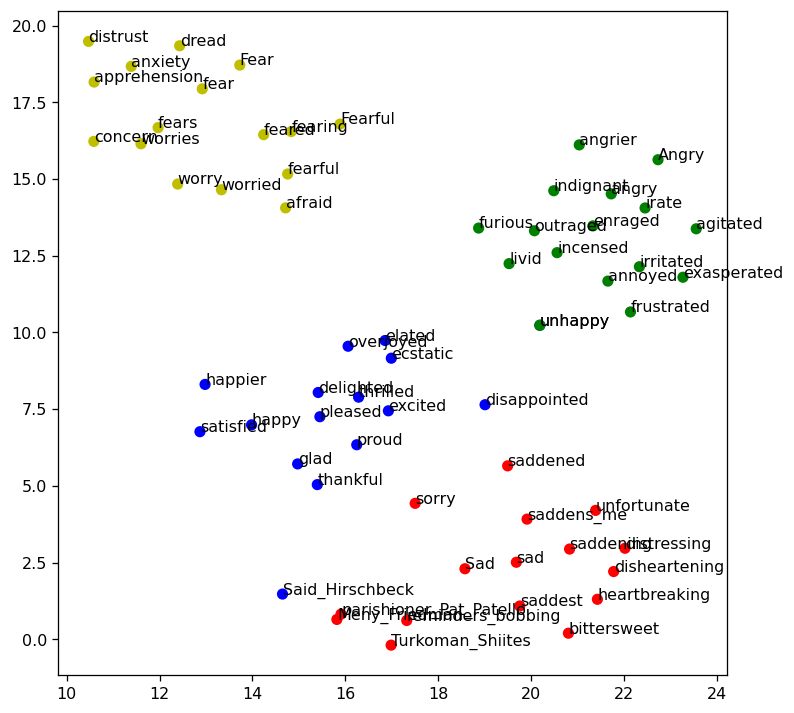

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]


## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## 2. Kaggle Competition & Report

In [18]:
import os
from tensorflow.python.client import device_lib
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import keras
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax, BatchNormalization
from keras.callbacks import CSVLogger, ModelCheckpoint
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

In [19]:
os.environ['CUDA_VISIBLE_DEVICES']='0'
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17869135503464091218
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 23350345728
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5974063794295634211
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090 Ti, pci bus id: 0000:02:00.0, compute capability: 8.6"
]


2022-11-25 21:18:59.765685: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA GeForce RTX 3090 Ti computeCapability: 8.6
coreClock: 1.905GHz coreCount: 84 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 938.86GiB/s
2022-11-25 21:18:59.766961: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2022-11-25 21:18:59.767078: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-11-25 21:18:59.767106: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2022-11-25 21:18:59.767123: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2022-11-25 21:18:59.768117: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1418] Created TensorFlow device (/device:GPU:0 with 22268 MB memory) -> physical GPU (device: 0, name: NVIDIA GeForce RTX 3090 Ti, pci bus id: 0000:02:00.0, compute capability: 8

In [20]:
## Read Data into pd dataframe
import pandas as pd
import json

emotion_df = pd.read_csv('emotion.csv')
di_df = pd.read_csv('data_identification.csv')
sample_sub_df = pd.read_csv('sampleSubmission.csv')
tweets_df = pd.read_pickle("tweets_df.pkl")

In [21]:
tweets_df

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [22]:
t_data = pd.merge(tweets_df, emotion_df)
t_data

,hashtags,tweet_id,text,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness
2,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear
3,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy
4,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation
...,...,...,...,...
1455558,"[NoWonder, Happy]",0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,joy
1455559,[],0x38959e,In every circumtance I'd like to be thankful t...,joy
1455560,[blessyou],0x2cbca6,there's currently two girls walking around the...,joy
1455561,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",joy


In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')

tokenizer.fit_on_texts(t_data['text'])

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=50, padding='post')
    return padded_sequences

In [26]:
padded_train_sequences = get_sequences(tokenizer, t_data['text'])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_train_sequences, t_data['emotion'] ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [28]:
print("x_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("x_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

x_train.shape:  (1091672, 50)
y_train.shape:  (1091672,)
x_test.shape:  (363891, 50)
y_test.shape:  (363891,)


In [29]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder
import keras
from keras.utils import np_utils

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 625604         fear
976516     surprise
1260188     disgust
383619          joy
Name: emotion, dtype: object

y_train.shape:  (1091672,)
y_test.shape:  (363891,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]

y_train.shape:  (1091672, 8)
y_test.shape:  (363891, 8)


In [69]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(8, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 50, 16)            160000    
_________________________________________________________________
bidirectional_30 (Bidirectio (None, 50, 80)            18240     
_________________________________________________________________
bidirectional_31 (Bidirectio (None, 50, 80)            38720     
_________________________________________________________________
bidirectional_32 (Bidirectio (None, 40)                16160     
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 328       
Total params: 233,448
Trainable params: 233,448
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import CSVLogger, ModelCheckpoint

csv_logger = CSVLogger('logs/training_log_2.csv')
callbacks = [ModelCheckpoint(filepath='./model_2/model_2_{epoch}.h5', save_weights_only=True, verbose=1, save_best_only=True), csv_logger]


h = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    batch_size=128,
    epochs=20, # Overfitting when 50 epoch
    callbacks=callbacks,
)

Epoch 1/20
8529/8529 [==============================] - 216s 24ms/step - loss: 1.3144 - accuracy: 0.5240 - val_loss: 1.2239 - val_accuracy: 0.5551

Epoch 00001: val_loss improved from inf to 1.22394, saving model to ./model_2/model_2_1.h5
Epoch 2/20
6351/8529 [=====================>........] - ETA: 48s - loss: 1.1885 - accuracy: 0.5693

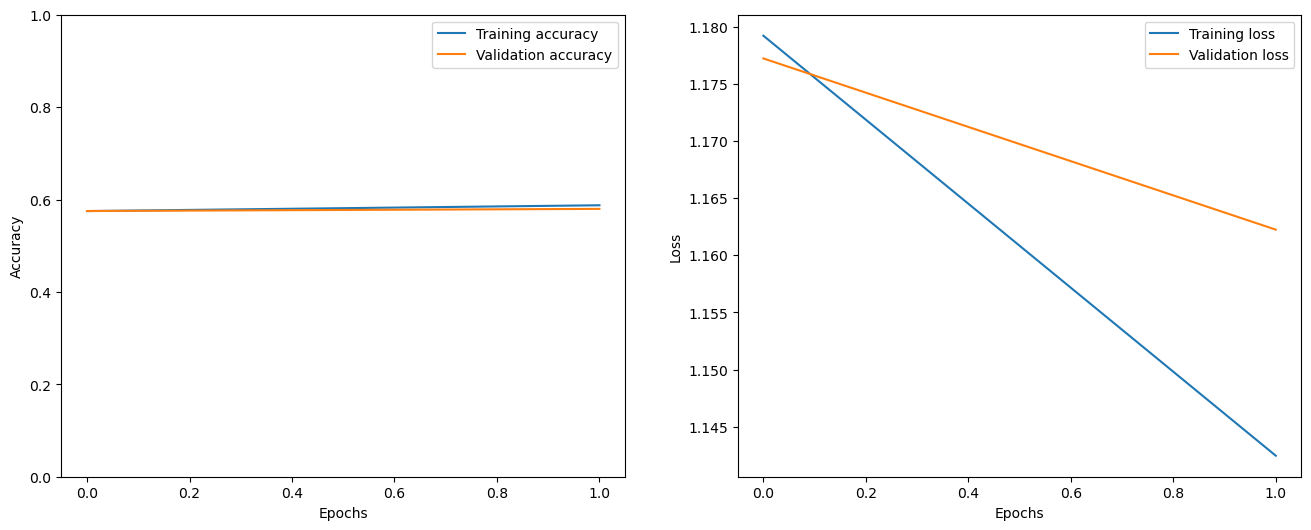

In [58]:
import matplotlib.pyplot as plt
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training accuracy')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation accuracy')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training loss')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

show_history(h)

In [59]:
eval = model.evaluate(X_test, y_test)

11372/11372 [==============================] - 92s 8ms/step - loss: 1.1471 - accuracy: 0.5862


In [38]:
di_df

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [39]:
di_df[di_df['identification'] == 'test']

,tweet_id,identification
0,0x28cc61,test
3,0x2db41f,test
15,0x2466f6,test
23,0x23f9e9,test
31,0x1fb4e1,test
...,...,...
1867495,0x2c4dc2,test
1867496,0x31be7c,test
1867500,0x1ca58e,test
1867515,0x35c8ba,test


In [40]:
tweets_test_df = pd.merge(tweets_df, di_df[di_df['identification'] == 'test'])
tweets_test_df

,hashtags,tweet_id,text,identification
0,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test
1,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test
2,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,test
3,"[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test
4,[],0x26289a,"In these tough times, who do YOU turn to as yo...",test
...,...,...,...,...
411967,[],0x2913b4,"""For this is the message that ye heard from th...",test
411968,[],0x2a980e,"""There is a lad here, which hath five barley l...",test
411969,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test
411970,[],0x29d0cb,I swear all this hard work gone pay off one da...,test


In [41]:
tweets_df

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [42]:
padded_test_sequences = get_sequences(tokenizer, tweets_test_df['text'])

In [43]:
padded_test_sequences.shape

(411972, 50)

In [44]:
predict = model.predict(padded_test_sequences, verbose=1)

12875/12875 [==============================] - 80s 6ms/step


In [45]:
predict.shape

(411972, 8)

In [46]:
import numpy as np
pred_result = label_decode(label_encoder, predict)

In [47]:
pred_result.shape

(411972,)

In [48]:
pred_result

array(['anticipation', 'anticipation', 'joy', ..., 'anticipation',
       'anger', 'sadness'], dtype=object)

In [49]:
tweets_test_df['emotion'] = pred_result

In [50]:
tweets_test_df

,hashtags,tweet_id,text,identification,emotion
0,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,anticipation
1,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,anticipation
2,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,test,joy
3,"[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test,joy
4,[],0x26289a,"In these tough times, who do YOU turn to as yo...",test,trust
...,...,...,...,...,...
411967,[],0x2913b4,"""For this is the message that ye heard from th...",test,anticipation
411968,[],0x2a980e,"""There is a lad here, which hath five barley l...",test,anticipation
411969,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test,anticipation
411970,[],0x29d0cb,I swear all this hard work gone pay off one da...,test,anger


In [51]:
output_submit = tweets_test_df[['tweet_id', 'emotion']]

In [52]:
output_submit

,tweet_id,emotion
0,0x28b412,anticipation
1,0x2de201,anticipation
2,0x218443,joy
3,0x2939d5,joy
4,0x26289a,trust
...,...,...
411967,0x2913b4,anticipation
411968,0x2a980e,anticipation
411969,0x316b80,anticipation
411970,0x29d0cb,anger


In [53]:
output_submit_2 = output_submit.rename(columns = {'tweet_id':'id'})

In [54]:
output_submit_2

,id,emotion
0,0x28b412,anticipation
1,0x2de201,anticipation
2,0x218443,joy
3,0x2939d5,joy
4,0x26289a,trust
...,...,...
411967,0x2913b4,anticipation
411968,0x2a980e,anticipation
411969,0x316b80,anticipation
411970,0x29d0cb,anger


In [56]:
output_submit_2.to_csv('output_submit_final.csv', index=False)